In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
# print('test')

In [2]:
title = "Average Projects pipeline"
os.getcwd()

'/Users/justintang/spAssignments/housingCA1'

In [3]:

data = np.genfromtxt('./completion-status-of-hdb-residential-developments.csv', delimiter=",", dtype=[('financial_year', 'U10'), ('type', 'U50'), ('status', 'U50'), ('no_of_units', 'f8')], missing_values=['na', '-'],filling_values=['0'], skip_header=1)

In [4]:

# print(data)
null_rows = np.isnan(data['no_of_units'])
filteredData = data[null_rows==False]
# print(filteredData)
# print("Filtered data: " + str(filteredData.shape))

Average for Awarded flats is 21080
Average for Under Construction flats is 37416
Average for Completed flats is 10166


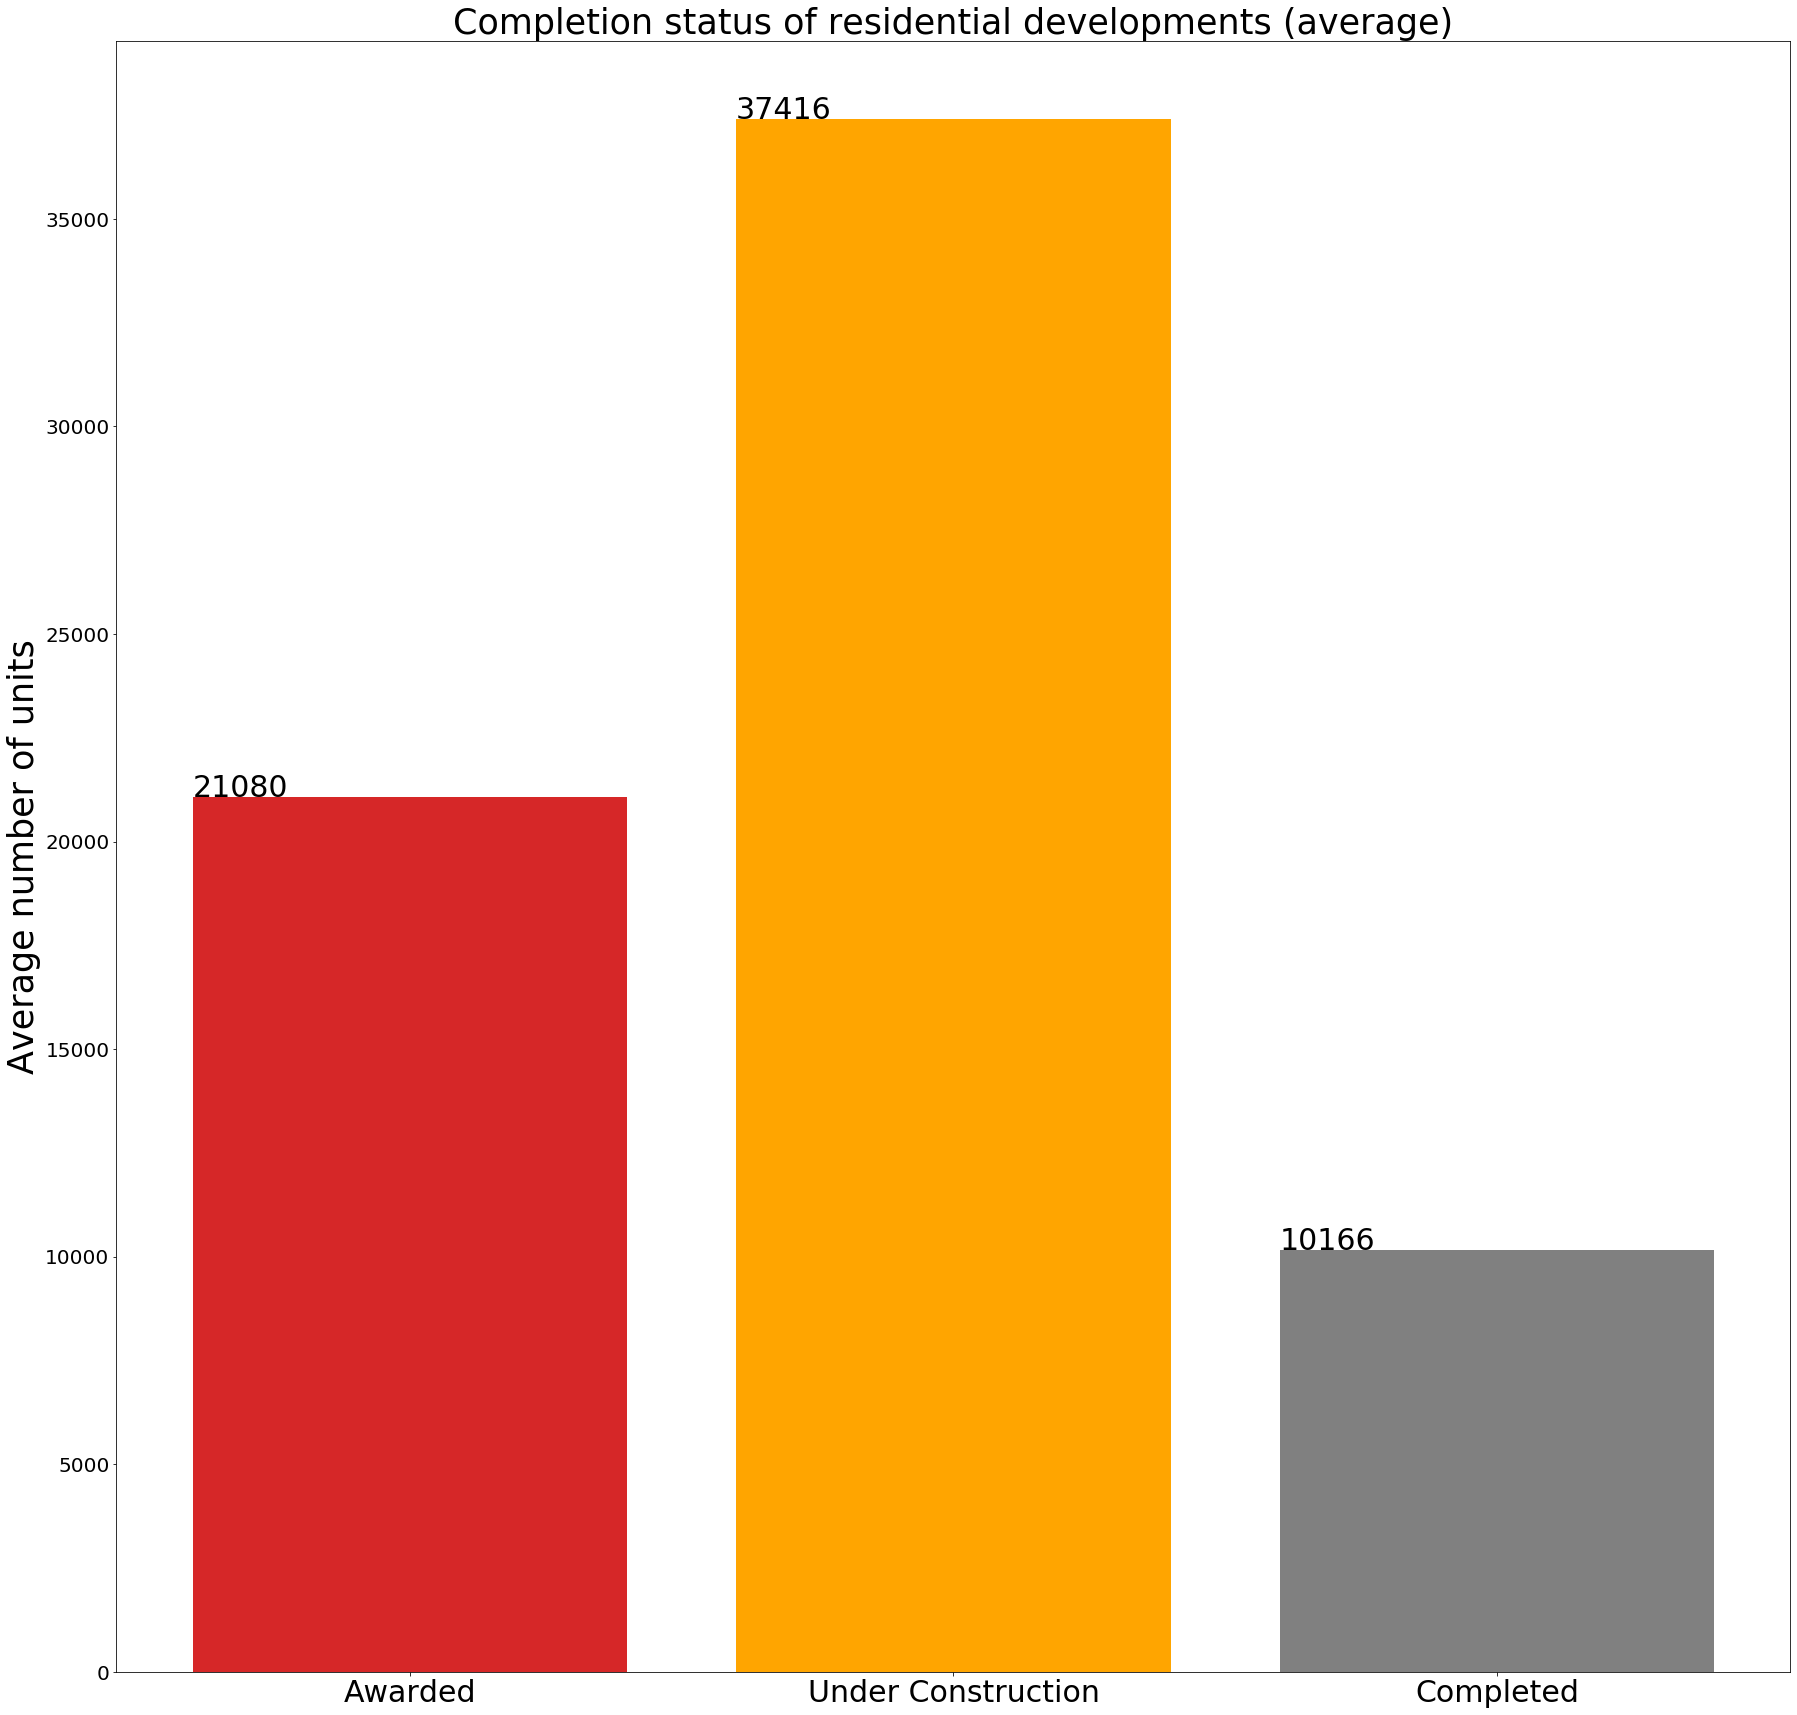

In [7]:
labels = list(set(data['status']))
# print(labels)
index = np.arange(0, len(labels))
status_numOfUnits = filteredData[['status','no_of_units']]
# print(status_numOfUnits)
numOfUnits = status_numOfUnits['no_of_units']
# print(numOfUnits)

avg_results = {}

for i in labels:
    unitsForStatus = numOfUnits[status_numOfUnits['status']==i]
    avg = np.average(unitsForStatus)
    print("Average for " + i + " flats is {:.0f}".format(avg))
    avg_results[i] = avg

# print(avg_results)

plt.figure(1, figsize=(30,30))
barchart = plt.bar(list(avg_results.keys()), list(avg_results.values()), color=['#d62728', '#FFA500', 'grey'])

for i in range(len(barchart)):
    bar = barchart[i]
    x,y  = bar.get_xy()
    h = bar.get_height()
    plt.text(x,h,"{:.0f}".format(list(avg_results.values())[i]),fontsize=30)

plt.title('Completion status of residential developments (average)',fontsize=35)
plt.ylabel('Average number of units',fontsize=35)
plt.yticks(fontsize=20)
plt.xticks(index, labels, fontsize=30,rotation='horizontal')


plt.show()